In [83]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as colors # type: ignore

### Costs

[User agreement](https://www.veoride.com/user-agreement/)

Cosmo/Astro: $1 to unlock, $0.35 per minute.

Cosmo speed: [8, 17] mph, range of 45 miles [cosmo](https://shop.veoride.com/products/cosmo-s)
Astro speed: [6, 15] mph, range of 43 miles [astro](https://www.veoride.com/astro/)


Taxes:
Sales tax: 9% of total in CU

Rental fees/charges [user-agreement](https://www.veoride.com/user-agreement/#:~:text=3.5.%20MAXIMUM%20RENTAL%20TIME%20AND%20CHARGES.)
Continuous rental time: 48 hours 
Maximum daily charge: $48 or accumulated rental, whichever is less.
Potential Service fee: $30 for rentals in excess of 24 hours.


In [5]:
cost = lambda t: 1.09 * (np.minimum((1 + (0.35 * t)), 48)) + ((t > 24*60)*30)

time = np.geomspace(start=1, stop=48*60, num=10, dtype=int)


print(cost(time))
print(time)

[ 1.4715  1.853   2.9975  6.431  14.061  32.7545 52.32   52.32   52.32
 82.32  ]
[   1    2    5   14   34   83  202  490 1188 2880]


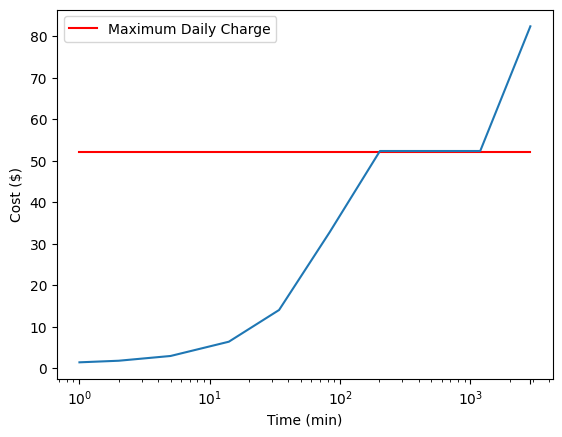

In [67]:
def cost_plot(max_charge_bool=True, x_label='Time (min)', y_label='Cost ($)'):
    fig, ax = plt.subplots()

    #ax.plot(time, cost(time))

    ax.set_xticks(time)
    ax.set_xscale('log')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ticks = np.array([1, 10, 100, 1000, 2880])
    ax.set_xticks(ticks)
    #ax.set_xticklabels(time)

    if max_charge_bool:
        max_charge = ax.plot(time, np.full_like(time, 48*1.09), color='red', label='Maximum Daily Charge')

    ax.legend()
    return fig, ax

fig, ax = cost_plot()
ax.plot(time, cost(time))

C:\Users\Ematt\AppData\Local\Temp\ipykernel_19236\2595220459.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


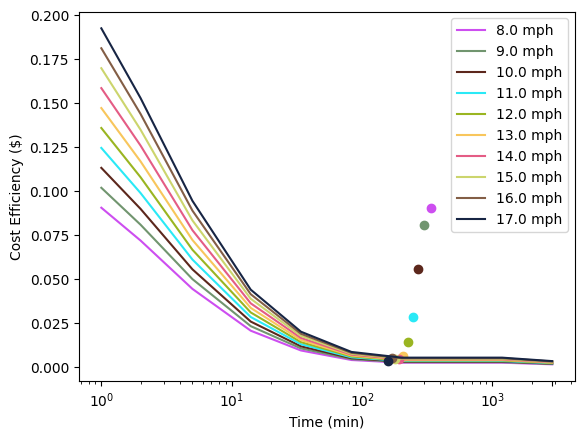

In [86]:
mpm = np.array([i + 8 for i in range(10)])/60

fig, ax = cost_plot(False, y_label='Cost Efficiency ($)')
for idx, i in enumerate(mpm):
    c = np.random.rand(3,)
    ax.plot(time, i/cost(time), label=f'{i*60} mph', color=c)
    ax.plot(45/i, i/cost(time[idx]), marker='o', color=c)
ax.legend()